# Problem Statement:

 Dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

1) Build a deep learning model to predict churn rate at bank. 

2) Once model is built, print classification report and analyze precision, recall and f1-score

-> Importing Various modules for use in project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

-> Reading the file from local directory and printing samples

In [2]:
df=pd.read_csv('Bank_churn_Modelling_data.csv')
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9894,9895,15704795,Vagin,521,France,Female,77,6,0.00,2,1,1,49054.10,0
6505,6506,15761053,Lock,596,Germany,Male,48,2,131326.47,1,0,0,1140.02,1
3851,3852,15697597,Chiemenam,631,France,Male,26,1,149144.61,1,0,1,123697.95,0
8345,8346,15763898,Toscani,568,Spain,Female,46,3,0.00,2,1,1,29372.62,0
6453,6454,15815070,Romano,566,Germany,Female,44,5,141428.99,2,0,0,68408.74,0


-> Finding shape of Data Sets and analysis the columns

In [3]:
df.shape

(10000, 14)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

-> Dropping Row Number, Customer Id and Surname as they are not useful

In [5]:
df.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

-> visualizing data types

In [6]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

-> Unique values in Geography

In [7]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

-> One hot Vector encoding for geography as there are 3 unique values and storing in other data frames

In [8]:
df1=pd.get_dummies(data=df,columns=['Geography'])
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0


-> Replacing Gender for binary

In [9]:
df1['Gender'].replace({'Male':0, 'Female':1},inplace=True)
df1.Gender

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: Gender, Length: 10000, dtype: int64

-> Creating variable for columns which need to be scaled from 0 to 1 

In [10]:
columns=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

In [11]:
from sklearn import preprocessing
scale=preprocessing.MinMaxScaler()

df1[columns]=scale.fit_transform(df1[columns])

In [12]:
for col in df1:
    print(df1[col].unique())

[0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.434 0.688 0.39

In [13]:
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

-> Splitting data into input and output

In [14]:
x=df1.drop(['Exited'], axis='columns')
y=df['Exited']

-> Splitting data into train and test

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [17]:
x.columns.shape

(12,)

-> Building artificial Neural network for given Problem and fitting the Test data

In [18]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(12,),activation='relu'),
    keras.layers.Dense(6,activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=50)

Epoch 1/50
250/250 [==============================] - 0s 831us/step - loss: 0.6064 - accuracy: 0.6919
Epoch 2/50
250/250 [==============================] - 0s 971us/step - loss: 0.4927 - accuracy: 0.7960
Epoch 3/50
250/250 [==============================] - 0s 988us/step - loss: 0.4716 - accuracy: 0.7965
Epoch 4/50
250/250 [==============================] - 0s 840us/step - loss: 0.4584 - accuracy: 0.8015
Epoch 5/50
250/250 [==============================] - 0s 799us/step - loss: 0.4485 - accuracy: 0.8069
Epoch 6/50
250/250 [==============================] - 0s 808us/step - loss: 0.4400 - accuracy: 0.8098
Epoch 7/50
250/250 [==============================] - 0s 792us/step - loss: 0.4349 - accuracy: 0.8115
Epoch 8/50
250/250 [==============================] - 0s 854us/step - loss: 0.4317 - accuracy: 0.8123
Epoch 9/50
250/250 [==============================] - 0s 762us/step - loss: 0.4300 - accuracy: 0.8151
Epoch 10/50
250/250 [==============================] - 0s 842us/step - loss: 0.428

In [19]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 712us/step - loss: 0.3608 - accuracy: 0.8515


[0.360752671957016, 0.8514999747276306]

In [20]:
yp=model.predict(x_test)
yp[:5]

array([[0.05594027],
       [0.05649477],
       [0.05050293],
       [0.06144974],
       [0.05347431]], dtype=float32)

-> Doing Hot one vector for predicted values

In [21]:
yp_s=[]
for i in yp:
    if(i>=0.5):
        yp_s.append(1)
    else:
        yp_s.append(0)
yp_s[:5]        
        

[0, 0, 0, 0, 0]

In [22]:
y[:5]

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

-> Calculating required Values and plotting the Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,yp_s))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.72      0.44      0.54       405

    accuracy                           0.85      2000
   macro avg       0.79      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



Text(69.0, 0.5, 'Y_Truth')

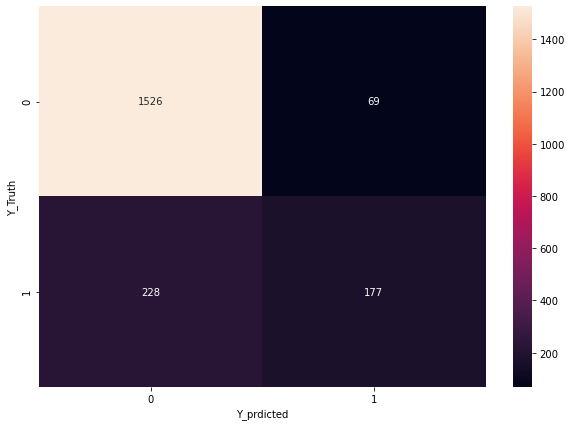

In [24]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=yp_s)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Y_prdicted')
plt.ylabel('Y_Truth')